In [2]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [3]:
import os
import json
from zipfile import ZipFile
from PIL import Image

In [4]:
!pip install kaggle

In [4]:
kaggle_credentails = json.load(open("kaggle.json"))

In [5]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [7]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

... resuming from 349175808 bytes (2548533379 bytes left) ...
100% 2.70G/2.70G [00:14<00:00, 199MB/s]
100% 2.70G/2.70G [00:14<00:00, 181MB/s]


In [7]:
!ls

 drive	      'new plant diseases dataset(augmented)'   new-plant-diseases-dataset.zip
 kaggle.json  'New Plant Diseases Dataset(Augmented)'   test


In [8]:
# Unzip the downloaded dataset
with ZipFile("new-plant-diseases-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [10]:
!ls

 drive	      'new plant diseases dataset(augmented)'   new-plant-diseases-dataset.zip
 kaggle.json  'New Plant Diseases Dataset(Augmented)'   test


Importing Libraries

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**DATA PREPROCESSING**

*Training Image*

In [10]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


VALIDATION IMAGE

In [11]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


## **BUILD MODEL**

In [12]:
my_model = tf.keras.models.Sequential()

In [13]:
my_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
my_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
my_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

my_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
my_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
my_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

my_model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
my_model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
my_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

my_model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
my_model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
my_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

my_model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
my_model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
my_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
my_model.add(tf.keras.layers.Dropout(0.25))                                          # avoid underfitting

In [15]:
my_model.add(tf.keras.layers.Flatten())
my_model.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [16]:
my_model.add(tf.keras.layers.Dropout(0.4))                                           #To avoid overfitting

In [17]:
#Output Layer
my_model.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### COMPLILING || TRAINING

In [20]:
my_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001) ,loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [22]:
training_history = my_model.fit(x=training_set,validation_data=validation_set,epochs=15)

Epoch 1/15
2197/2197 [==============================] - 178s 76ms/step - loss: 1.3585 - accuracy: 0.5993 - val_loss: 0.5001 - val_accuracy: 0.8420
Epoch 2/15
2197/2197 [==============================] - 162s 73ms/step - loss: 0.4533 - accuracy: 0.8557 - val_loss: 0.2891 - val_accuracy: 0.9085
Epoch 3/15
2197/2197 [==============================] - 161s 73ms/step - loss: 0.2623 - accuracy: 0.9160 - val_loss: 0.3160 - val_accuracy: 0.8964
Epoch 4/15
2197/2197 [==============================] - 162s 74ms/step - loss: 0.1837 - accuracy: 0.9406 - val_loss: 0.2627 - val_accuracy: 0.9223
Epoch 5/15
2197/2197 [==============================] - 160s 73ms/step - loss: 0.1384 - accuracy: 0.9534 - val_loss: 0.1387 - val_accuracy: 0.9577
Epoch 6/15
2197/2197 [==============================] - 161s 73ms/step - loss: 0.1081 - accuracy: 0.9644 - val_loss: 0.2453 - val_accuracy: 0.9347
Epoch 7/15
2197/2197 [==============================] - 158s 72ms/step - loss: 0.0843 - accuracy: 0.9725 - val_loss: 0

### EVALUATION OF THE MODEL

In [23]:
#Training set Accuracy
train_loss, train_acc = my_model.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 55s 25ms/step - loss: 0.0213 - accuracy: 0.9941
Training accuracy: 0.9940536022186279


In [25]:
# Image Parameters
img_size = 224
batch_size = 32

In [24]:
#Validation set Accuracy
val_loss, val_acc = my_model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 14s 24ms/step - loss: 0.1088 - accuracy: 0.9711
Validation accuracy: 0.9710903763771057


### VISUALISATION TOOLS

In [26]:
training_history.history

{'loss': [1.3585000038146973,
  0.4532700777053833,
  0.2622852027416229,
  0.1837005615234375,
  0.13837198913097382,
  0.10814646631479263,
  0.08430405706167221,
  0.07515065371990204,
  0.0639662817120552,
  0.057262271642684937,
  0.05332052335143089,
  0.043691739439964294,
  0.041633713990449905,
  0.038166094571352005,
  0.03713954985141754],
 'accuracy': [0.5993313789367676,
  0.855665385723114,
  0.9159968495368958,
  0.9406074285507202,
  0.9534390568733215,
  0.9644213914871216,
  0.972544252872467,
  0.9750195741653442,
  0.9793015122413635,
  0.9816203117370605,
  0.9829148650169373,
  0.9860302805900574,
  0.9869834184646606,
  0.9879223108291626,
  0.9881499409675598],
 'val_loss': [0.5001130700111389,
  0.2891317903995514,
  0.31596770882606506,
  0.26269352436065674,
  0.13868436217308044,
  0.2452743500471115,
  0.13508851826190948,
  0.11488883942365646,
  0.13528084754943848,
  0.11148218810558319,
  0.12714561820030212,
  0.21434347331523895,
  0.1155521422624588,

In [27]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [28]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


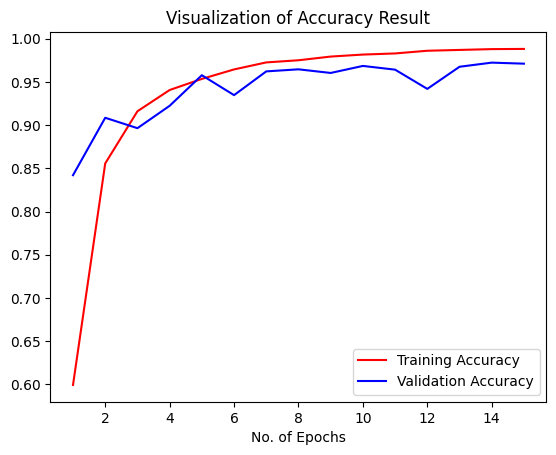

In [29]:
epochs = [i for i in range(1,16)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

Precision Recall Fscore

In [31]:
class_name = validation_set.class_names
print(class_name)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [32]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [33]:
y_pred = my_model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 55s 3ms/step


In [34]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [35]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.96      0.97       504
                                 Apple___Black_rot       0.99      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.97      0.99      0.98       440
                                   Apple___healthy       0.99      0.95      0.97       502
                               Blueberry___healthy       0.97      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.92      0.99      0.96       421
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.90      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.94      0.

### Confusion Matrix Visualise

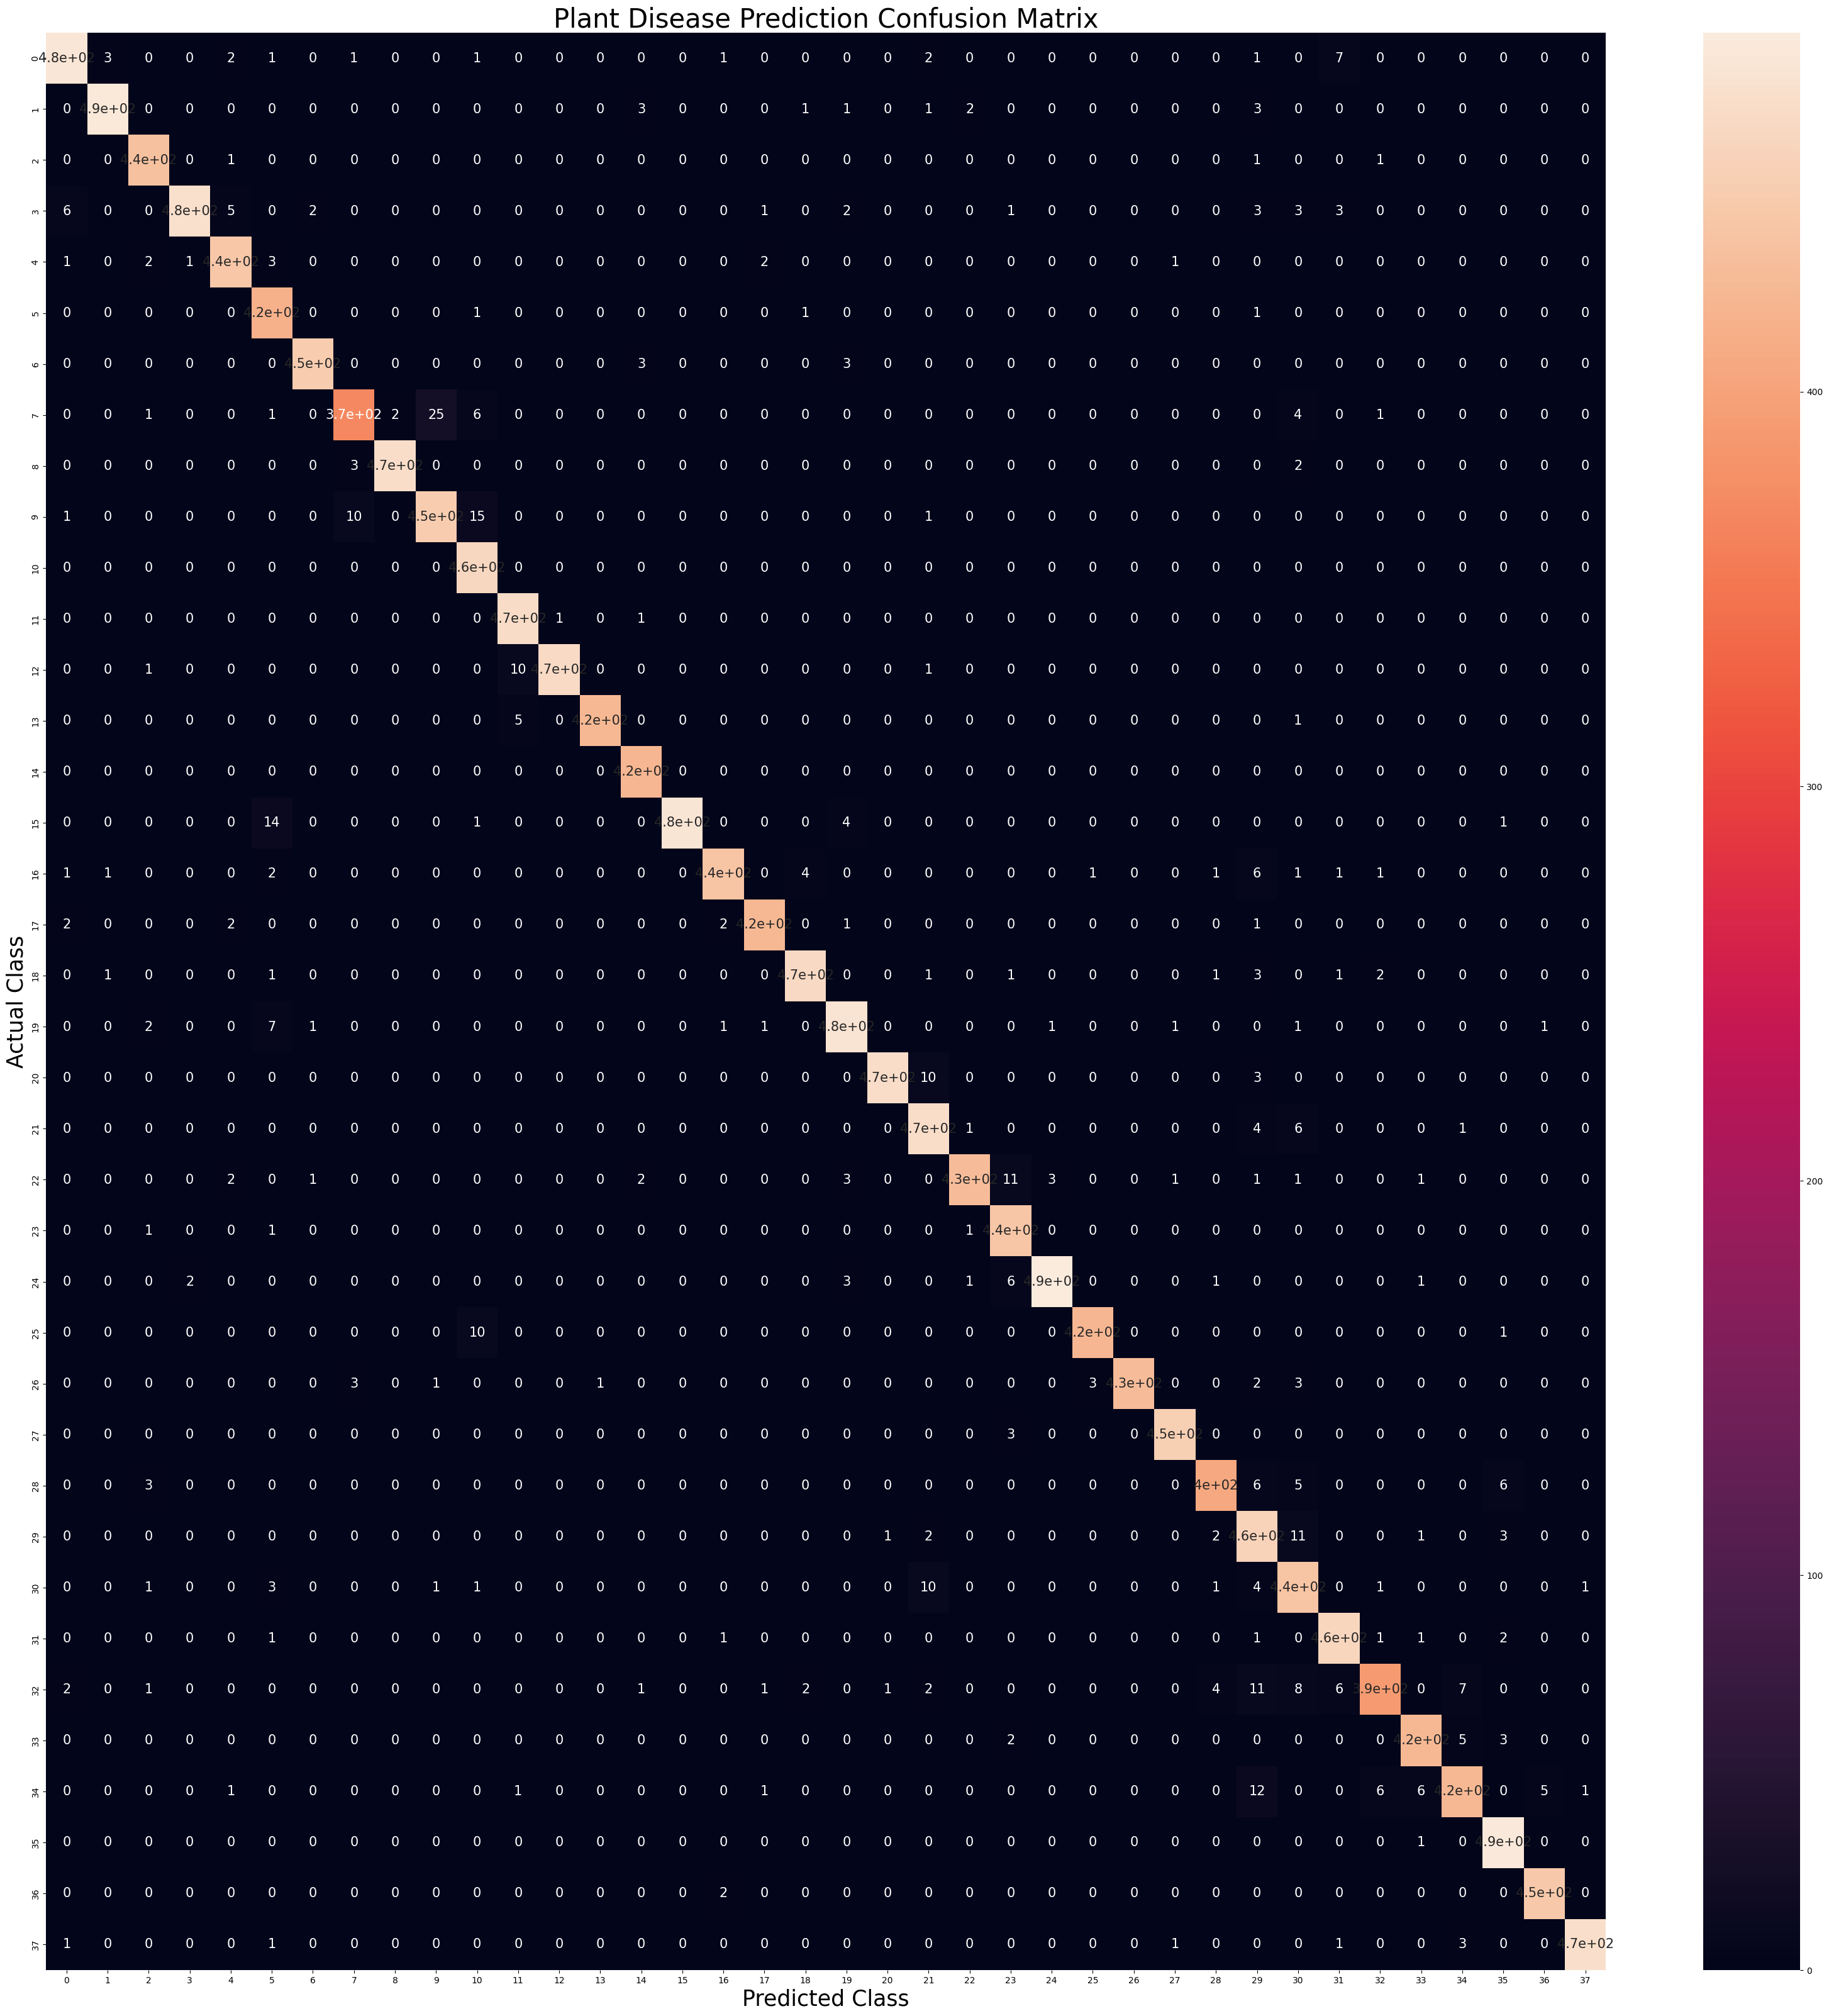

In [43]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 15})

plt.xlabel('Predicted Class',fontsize = 25)
plt.ylabel('Actual Class',fontsize = 25)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 30)
plt.show()

### SAVE MODEL

In [ ]:
my_model.save('/content/drive/MyDrive/trained_plant_disease.keras')

In [ ]:
my_model.save('/content/drive/MyDrive/trained_plant_disease.h5')